In [1]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
from lab_functions import *
import pandas as pd

![I Like Me Better When I'm With You: Billboard Icons Guiding Future Chart-Toppers](Banner_2.png)


# Executive Summary

In the study, a mentorship model for the music industry was aimed to be developed, leveraging advanced data processing techniques to pair emerging artists with established mentors. Billboard’s Year-End Top Artists data and Wikipedia were utilized, with the aim of bridging the gap between new and experienced artists, offering a strategic path for industry navigation. Tokenization, TF-IDF vectorization, and cosine distance measurement were involved in the approach. Several potential mentors were matched by the information retrieval system, and a Cohen’s Kappa score of 0.57 was returned from the evaluation, indicating moderate agreement. The precision of the system was calculated to be 0.6, and the recall rate was found to be 0.097. The Precision-Recall curve (AUC-PR) of the information retrieval system showed high precision for top-ranked mentor-mentee matches but experienced a sharp decrease beyond the top three matches, calculated at 0.2179. An innovative approach to facilitating mentorship in the music industry is presented by the study, underscoring the importance of strategic pairing for effective mentorship. However, limitations were noted, such as the reliance on publicly available data and the dynamic nature of the industry. The enhancement of these findings through the incorporation of more diverse data sources and real-time analytics is suggested for future research.In the study, a mentorship model for the music industry was aimed to be developed, leveraging advanced data processing techniques to pair emerging artists with established mentors. Billboard’s Year-End Top Artists data and Wikipedia were utilized, with the aim of bridging the gap between new and experienced artists, offering a strategic path for industry navigation. Tokenization, TF-IDF vectorization, and cosine distance measurement were involved in the approach. Several potential mentors were matched by the information retrieval system, and a Cohen’s Kappa score of 0.57 was returned from the evaluation, indicating moderate agreement. The precision of the system was calculated to be 0.6, and the recall rate was found to be 0.097. The Precision-Recall curve (AUC-PR) of the information retrieval system showed high precision for top-ranked mentor-mentee matches but experienced a sharp decrease beyond the top three matches, calculated at 0.2179. An innovative approach to facilitating mentorship in the music industry is presented by the study, underscoring the importance of strategic pairing for effective mentorship. However, limitations were noted, such as the reliance on publicly available data and the dynamic nature of the industry. The enhancement of these findings through the incorporation of more diverse data sources and real-time analytics is suggested for future research.

# Introduction

For the latest songs and artists in vogue, listeners all over the world looked no further than Billboard. Billboard is a music publication that has been around since the early 20th century which covers news, opinions, reviews and the like. One of their regular publications is their Top 100 artists, a list they update regularly from various metrics (singles sales, radio airplay, digital downloads, and streaming activity).

For decades, people referred to Billboard for music recommendations, each week a surprise to its readers as artists old and new fell off the charts or shot up to fame. Chart predictions, however, were a tough call, as there was no way for record labels to tell if an artist would make good sales before a new record was released. Many left this up to luck.

To get on the charts, perhaps new and unknown artists would benefit from a mentor. If Billboard artists could teach, inspire, and collaborate with fresh faces in the music industry, they might be able to guide these newcomers to stardom and guarantee chart success. The effectiveness of this mentorship, however, hinges on the strategic pairing of new artists with suitable Billboard veterans.

The correlation between new artists and Billboard chart-toppers may be found in their Wikipedia articles. Wikipedia is a web-based encyclopedia, and it contains information on a vast array of topics. This includes information on up-and-coming and already well-established artists in the music industry. Each Wikipedia article contains a plethora of data points that can be used to gauge artist relevancy, such as genre, record label, and years active, among others.

# Significance of the Study and Problem Statement

The study’s findings can benefit new artists and record labels by helping them identify experienced artists to serve as models for their marketing strategies. It provides inspiration for new artists by showcasing successful strategies employed by those who have already made a mark in the industry. This can include insights into how to build a distinctive brand, connect with audiences, and leverage various promotional channels.

For record labels, the study aids in recognizing artists who have not only achieved success but have done so in a way that aligns with effective marketing practices. Understanding the commonalities in the marketing strategies of these experienced artists can also guide record labels in making informed decisions about signing and promoting emerging talent.

In essence, the study acts as a knowledge repository for what has worked well in the past for artists who have navigated the challenges of the music industry. By leveraging these findings, new artists and record labels can make more informed choices, avoid potential pitfalls, and craft marketing strategies that are not only innovative but also grounded in proven success.

# Scope and Limitations

This project is to use solely the information found in each artist's Wikipedia sidebar to identify artists who are similar to a certain artist. Over a seventeen-year period, data was gathered from the top 100 artists that were featured on Billboard.com. The main goal is to investigate how artists are similar to each other based on the information with their Wikipedia sidebars, which includes information about birthdates, nationalities, and accolades. It also emphasizes how user-edited and vetted Wikipedia data is, while acknowledging the method's shortcomings and possible biases.

Scope:

1. **Data Source**: The data used in this project was scraped through billboard.com and wikipedia.com
2. **Artist Selection Criteria**: The artists were chosen on their appearance in the top 100 artist of the year over a span of seventeen years. 
3. **Artist Information**: In this project, the information regarding the selected artist was scrapped via their Wikipedia page specifically in their sidebars. 
4. **Temporal Range and Focus**: The seventeen-year period offers a contemporary snapshot of trends in the music industry, focusing on artists who have attained a high level of commercial success during this time.

Limitation:

1. **Data Source Constrain**t: The chosen artists from the Billboard.com doesn’t necessarily represent the whole music industry
2. **Data Completeness and Accuracy**: The Wikipedia page of the artists may not fully give accurate and complete information regarding the artists.
3. **Scope of the data**: The data is only limited on the Wikipedia sidebar of the artists, omitting some qualitative information that can be found overall Wikipedia content.


# Data Sources and Description
Two datasets were used for the study: the Billboard Year End Top Artists scraped from the Billboard website, and articles from Wikipedia.

## [Billboard Year End Top Artists](https://www.billboard.com/charts/year-end/2022/top-artists/)

The Billboard Year End Top Artists dataset (Billboard, 2023) is comprised of the top 100 artists by the end of each year according to their cumulative Billboard score. Their scores and rankings are calculated by radio airplay, digital and retail sales, and streaming. Only data from the years 2006 to 2022 are available on the website. The data was scraped from Billboard’s website last November 16, 2023. The rankings of the artists for each year were not collected as only the artist names were pertinent to our study.

## [English Wikipedia](https://en.wikipedia.org/wiki/Main_Page)


The Wikipedia dataset is composed of textual data from the Wikipedia pages from the Wikimedia foundation of recording artists both present in the Billboard dataset and as well as the queries for the information retrieval system.

Using the list of artists from the Billboard dataset, their corresponding Wikipedia pages were retrieved using the Wikipedia API. The sidebar content was retrieved by making a query of the artist name as title, and getting the latest revision of their Wikipedia page. The retrieved data contains the sidebar section content of their Wikipedia page which will be used as data for the artist.

Similar process was done for specific artists to be used as queries for the information retrieval system. The artists chosen were arbitrary, based mainly on user interest and absence in the Billboard list.

Figure 2. Sample of Wikipedia Dataset


# Data Processing

Preprocessing is done in the 'Preprocessing_Notebook.ipynb'.

## Billboard

To scrape Billboard’s website, the function “topartists(year)” was created to take artists names from the chart on the static page of the year input. The function returned a pandas dataframe of all the names that appeared on the chart for the year.

Another function “alltopartists()” was made to iterate topartists(year) through all years available on the website (2006 to 2023) and collate them all into one pandas dataframe. Duplicates other than the first iteration of the artist were removed. The list was then sorted alphabetically and re-indexed.

The dataframe is then stored into a pickle named “artists.pkl”.

## Wikipedia

The list of artist names from Billboard is run through the get_wikipedia_url() function, which retrieves the Wikipedia URL for a given page title using the Wikipedia API. Some names return the wrong page (e.g. “The Eagles” returning the Wikipedia page for “Eagle” rather than “Eagles (Band)”) were manually edited from the returned list.

These links are then run through the function scrape_wikipedia_sidebar() which scrapes the information from the sidebar of given Wikipedia pages and returns a dictionary with the keys as the sidebar headers and the values as the sidebar values. When the function encounters a notable people page or a disambiguation page, it takes the links out of the page and finds the link that contains ["band", "musician", "singer", "rapper", "artist"] and recursively runs the found link if any back through the function.
The scraped sidebars, along with the urls and original names, are concatenated into a Pandas DataFrame.

In [3]:
raw_data = pd.read_pickle('raw_data.pkl')
print('Table 1. Artist Dataset with Sidebar content')
print('Shows the first five samples of the dataset')
raw_data.head()

Table 1. Artist Dataset with Sidebar content
Shows the first five samples of the dataset


,URL,Name,Scraped_Sidebar,content
0,https://en.wikipedia.org/wiki/2_Chainz,2 Chainz,{'Born': 'Tauheed K. Epps ( 1977-09-12 ) Septe...,"Tauheed K. Epps ( 1977-09-12 ) September 12, 1..."
1,https://en.wikipedia.org/wiki/21_Savage,21 Savage,"{'Birth name': 'Shéyaa Bin Abraham-Joseph', 'B...",Shéyaa Bin Abraham-Joseph ( 1992-10-22 ) Octob...
2,https://en.wikipedia.org/wiki/24kGoldn,24kGoldn,"{'Birth name': 'Golden Landis Von Jones', 'Als...",Golden Landis Von Jones Goldn El Dorado ( 2000...
3,https://en.wikipedia.org/wiki/3OH!3,3OH!3,"{'Origin': 'Boulder, Colorado , U.S.', 'Genres...","Boulder, Colorado , U.S. Electropop synth-pop ..."
4,https://en.wikipedia.org/wiki/5_Seconds_Of_Summer,5 Seconds Of Summer,"{'Also known as': '5SOS', 'Origin': 'Sydney , ...","5SOS Sydney , New South Wales , Australia Pop ..."


# Methodology

Processes included in the methodology is done in the 'IRS_Notebook.ipynb'. Steps for the methodology used is summarized under Figure 1 below:

Figure 1. Methodology Flowchart
![Methodology Flowchart](Methodology_Flowchart.png)

## Manual Labelling

The artist dataset from Billboard was first labelled accordingly by manual rating. Two raters identified artists who are suitable to be mentors to the query artist. Raters based their rating on their own intuition, while keeping themselves independent from one another. To test the reliability of their ratings, Cohen’s kappa (Eqn. 1) was computed and must have a value of at least 0.5 to qualify.

$$
{\displaystyle \kappa \equiv {\frac {p_{o}-p_{e}}{1-p_{e}}}=1-{\frac {1-p_{o}}{1-p_{e}}}}
$$
<center>Equation 1. Cohen's Kappa</center>
<br>
Once the two sets of ratings were qualified, labels were set for each artist by random using the function np.random.choice(). With this method, artists that both raters identified as mentors or not will be set as is, while artists that only one of the two raters identified as a mentor will have a 50% chance of being part of the list of mentors.

## Tokenization

The sidebar content was additionally processed using a function ‘remove_parentheses’ that removes any instance of a parentheses inside either dataframe and replaces it with an empty string.  This was done to remove unnecessary or redundant information inside the dataframes.

The dataframes were prepared by the team, after which TF-IDF vectorization was implemented. TF-IDF, which stands for Term Frequency-Inverse Document Frequency is a numerical statistic that is reflective of the importance of a word in a document within a collection or corpus. In cases such as this, which involve information retrieval. It is used for normalizing text data in regard to the importance or relevance of words within documents. The frequencies of terms that appear frequently across all documents are reduced, while the importance of terms that are rare across the corpus but frequent in individual documents is increased. This approach is helpful for classification and clustering down the line.

The function ‘TfidfVectorizer()’ was taken from the sklearn package and stored in a parameter named ‘vectorizer’ for convenience when calling it. The new matrices were then converted into a single array, ‘bow_matrix’ and ‘target_matrix’ respectively, following vectorization. These vectorized data were then utilized to train the model. Following the training, the model's performance was evaluated using a confusion matrix. A detailed breakdown of the model’s predictions versus actual classifications was provided by this, highlighting true positives, false negatives, true negatives, and false negatives.

In [4]:
bow_matrix = pd.read_pickle('bow.pkl')
print('Table 2. Data Matrix from Wikipedia Sidebar Content of Billboard'
      ' Top 100 Year-End Artists')
print('Shows the first five rows of the data matrix')
bow_matrix.head()

Table 2. Data Matrix from Wikipedia Sidebar Content of Billboard Top 100 Year-End Artists
Shows the first five rows of the data matrix


,000,01,06,10,100,1017,10k,11,12,121,...,étienne,þórhallsson,ˈxæːlɪd,ぼうだんしょうねんだん,少年,朴載,防弾少年団,防彈,방탄,소년
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171228,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
target_vector = pd.read_pickle('target.pkl')
print('Table 3. Target Vector from Wikipedia Sidebar Content of Query Artist')
print('Shows the Target Vector')
target_vector

Table 3. Target Vector from Wikipedia Sidebar Content of Query Artist
Shows the Target Vector


,000,01,06,10,100,1017,10k,11,12,121,...,étienne,þórhallsson,ˈxæːlɪd,ぼうだんしょうねんだん,少年,朴載,防弾少年団,防彈,방탄,소년
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Information Retrieval System

The team utilized a method to retrieve the k most similar elements from the corpus to the target, using Cosine distance as the measure. The information taken from the sidebar of the top 100 artists’ Wikipedia page was specifically compared to the queried artists. Similarities were found here, and the most similar ones were matched to them as potential coaches.

The function ‘dcos’ was created by the team to compute the cosine distance between two vectors (‘vec1’ and ‘vec2’). In the case where these vectors are matrices, an array of cosine distances for corresponding rows is returned. Cosine distance is a key metric in this context, as it effectively measures the similarity between two artists’ profiles.


Cosine distance was particularly suitable for the study as it focuses on the orientation of the vectors rather than their magnitude. Since the vectors represent the frequency of terms in the sidebar texts, cosine distance allows the team to compare the directionality of these vectors—in other words, the overall pattern of word usage in the sidebars—rather than just the sheer number of terms, which can be misleading due to varying lengths or details in sidebars.

The function was then evaluated through ‘get_confusion’. This function generates a confusion matrix from the actual classification category of an artist, their indices returned by the similarity search, and the complete set of possible classification categories (all_labels). The matrix is structured to track four types of outcomes in classification: 

- True Positives (TP): Instances where the model correctly identifies an artist as belonging to a particular category.
- False Positives (FP): Instances where the model incorrectly identifies an artist as belonging to a particular category.
- True Negatives (TN): Instances where the model correctly identifies that an artist does not belong to a particular category.
- False Negatives (FN): Instances where the model fails to identify an artist as belonging to a particular category.


The confusion matrix is a vital tool in assessing the accuracy and effectiveness of the classification process in the study. It assists the team in understanding how well the model differentiates between artists based on their profile similarities. 

By calculating the cosine distance between the vector of an upcoming artist and those of the Billboard Top 100 artists, it is possible to identify which established artists have the most similar Wikipedia sidebar content. A higher degree of similarity in their profiles, indicating potential commonalities in their musical styles, backgrounds, or public images, is suggested by a lower cosine distance between an upcoming artist and a Billboard artist. This method enables effective grouping of upcoming artists with well-established ones, based on the similarity of their publicly available information.

The results of the information retrieval system will be evaluated using the Precision and Recall metrics. Equations 2 and 3 shows the precision and recall formulae.

$$P = \frac{r}{k} = \frac{TP}{TP + FP}$$
<center>Equation 2. Precision</center>
<br>
$$R = \frac{r}{n} = \frac{TP}{TP + FN}$$
<center>Equation 3. Recall</center>
<br>
F-measure, as shown in Equation 4, will also be calculated for a single score that represents both Precision and Recall. An F-measure with beta=0.3 will be used to focus on precision rather than recall. In getting a mentor for the query artist, false positives are considered more important than false negatives since the number of possible mentors can be numerous but would be hard to filter if the shortlist is too big. Having a more precise information retrieval system is then deemed more important.
$$F_\beta = (1 + \beta^2) \cdot \frac{P \cdot R}{(\beta^2 \cdot P) + R}$$
<center>Equation 4. F-measure</center>
<br>
Finally, the information retrieval system will be evaluated by graphing the Precision-Recall (PR) Curve to give a look at the performance at all k's possible.

# Results

Cohen's kappa was computed with the help of Idostatistics. The computed Cohen’s Kappa for the reliability rating between the two raters is 0.57 therefore both raters are moderately in agreement with one another. The computed score is above our set threshold of 0.5 which qualifies the ratings done.

The generated list of 31 mentors based on the methodology above is listed below:

- Adele
- Alicia Keys
- Amy Winehouse
- Anderson .Paak
- Becky G
- Bruno Mars
- Capital Cities
- Celine Dion
- Coldplay
- Florence + The Machine
- H.E.R.
- Hozier
- Jason Mraz
- Joji
- Josh Groban
- Lady Gaga
- Lana Del Rey
- Lauv
- Lorde
- Mac Miller
- Michael Buble
- Natasha Bedingfield
- Norah Jones
- Pentatonix
- Sade
- Sam Smith
- Sara Bareilles
- Steve Lacy
- Susan Boyle
- Trans-Siberian Orchestra
- Troye Sivan

The mentor labelling are added to the raw data.

In [6]:
raw_labelled = pd.read_pickle('raw_with_labels.pkl')
print('Table 4. Raw Dataset with Mentor Labels')
raw_labelled.head()

Table 4. Raw Dataset with Mentor Labels


,URL,Name,Scraped_Sidebar,content,mentor
0,https://en.wikipedia.org/wiki/2_Chainz,2 Chainz,{'Born': 'Tauheed K. Epps ( 1977-09-12 ) Septe...,"Tauheed K. Epps ( 1977-09-12 ) September 12, 1...",0.0
1,https://en.wikipedia.org/wiki/21_Savage,21 Savage,"{'Birth name': 'Shéyaa Bin Abraham-Joseph', 'B...",Shéyaa Bin Abraham-Joseph ( 1992-10-22 ) Octob...,0.0
2,https://en.wikipedia.org/wiki/24kGoldn,24kGoldn,"{'Birth name': 'Golden Landis Von Jones', 'Als...",Golden Landis Von Jones Goldn El Dorado ( 2000...,0.0
3,https://en.wikipedia.org/wiki/3OH!3,3OH!3,"{'Origin': 'Boulder, Colorado , U.S.', 'Genres...","Boulder, Colorado , U.S. Electropop synth-pop ...",0.0
4,https://en.wikipedia.org/wiki/5_Seconds_Of_Summer,5 Seconds Of Summer,"{'Also known as': '5SOS', 'Origin': 'Sydney , ...","5SOS Sydney , New South Wales , Australia Pop ...",0.0


The results of the information retrieval system is shown below:

In [7]:
print('Table 5. Result of Information Retrieval')
print('Shows the retrieved results when k=5')
pd.read_pickle('result.pkl')

Table 5. Result of Information Retrieval
Shows the retrieved results when k=5


,Name,mentor
422,Steve Lacy,1.0
257,Lauv,1.0
341,Norah Jones,1.0
137,Em Beihold,0.0
369,Pop Smoke,0.0


The following are the artists returned by the Information Retrieval system:

**Steve Lacy** is an American musician, singer, songwriter, and record producer known for his work as the guitarist for the band The Internet. He has also pursued a solo career with a focus on R&B and funk. His song “Bad Habit” reached number one on the Billboard Hot 100 after going viral on TikTok in 2022 (Billboard, 2022). He is signed under AWAL, the same recording label as Laufey.

**Lauv**, whose real name is Ari Staprans Leff, is an American singer, songwriter, and record producer who peaked at 35 on the Billboard Hot 100 in 2018 with his song “I Like Me Better” (Billboard, 2018). He is known for his pop and electronic-influenced sound and has gained popularity for songs exploring themes of love and mental health. He is signed under AWAL, the same recording label as Laufey.

**Norah Jones** is an American singer, songwriter, and pianist known for her soulful jazz and contemporary style. She gained widespread acclaim with her 2002 debut album "Come Away with Me", whose track topped the Billboard 200 at No. 1. Her 2016 album “Day Breaks” peaked at No. 1 on Billboard’s Top Jazz Album charts as well (Billboard, n.d.). She and Laufey are both artists in the jazz genre. Interesting to note is Laufey’s 2023 holiday collaboration single with Norah Jones, “Christmas With You”, which features a cover of “Have Yourself a Merry Little Christmas” as well as an original track by the two (Norah Jones official website, 2023).

**Em Beihold** is a new American singer-songwriter best known for her 2022 single “Numb Little Bug”, which ranked 32nd on the Billboard Hot 100 after going viral on TikTok in June of the same year. She and Laufey are both artists in the pop genre. Both have collaborated with singer-songwriter Stephen Sanchez, each performing a rendition of his single “Until I Found You” with him (Billboard, 2023; Restu prasetyo Adi, 2023).

**Pop Smoke** was an American rapper and songwriter known for his contributions to the drill music genre, which is a subgenre of hip hop. His sleeper hit “Dior” was 83rd on the year-end Billboard Hot 100 for 2020. Warner Chappell Music signed a co-publishing deal with his estate four months after his murder (Variety, 2020). Laufey signed a global publishing deal with the same publisher in August 2023.

To evaluate the accuracy of the retrieved results, a confusion matrix was created. The confusion matrix as shown in table 6 shows that out of the 505 artists in our dataset, the top three retrieved artists are true positives, while the other two artists retrieved were false positives. Meanwhile, 28 other mentors that are still in the database and were not considered to be part of the results. Finally, 472 artists that were not tagged as mentors were not retrieved by the system.

In [8]:
print('Table 6. Confusion Matrix from retrieved results')
print('Shows the confusion matrix from retrieved results when k=5')
conf_mat = get_confusion(1, nearest_k(target_vector, bow_matrix, 5, dcos),
                         raw_labelled['mentor'])
conf_mat

Table 6. Confusion Matrix from retrieved results
Shows the confusion matrix from retrieved results when k=5


,relevant,irrelevant
relevant,3,2
irrelevant,28,472


By using the equations 2 & 3 , we can calculate the precision and recall of the system respectively. With five artists retrieved, the calculated precision of the system is 0.6, while the recall is at 0.097

To understand the capability of the information retrieval system further, the area under the Precision-Recall curve was calculated. The AUC-PR of the information retrieval system show in figure 2 had a value of 0.2179 while the F-measure for the result of k=5 is 0.4198.

Figure 2. Precision-Recall Curve
F-measure: 0.4198
AUC-PR: 0.2179


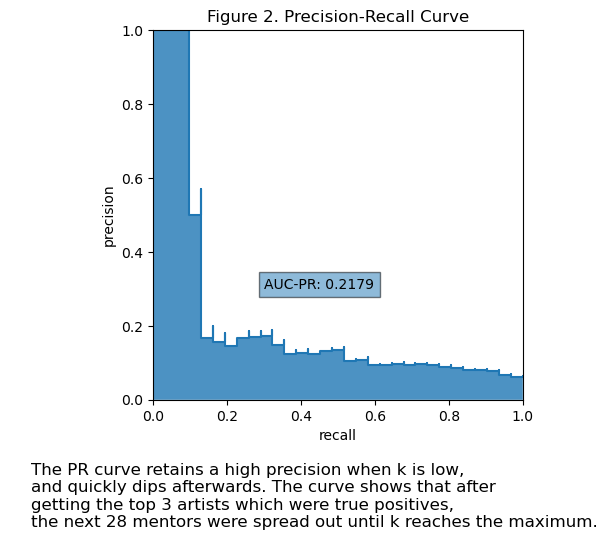

In [9]:
print('Figure 2. Precision-Recall Curve')
f_m = f_measure(precision(conf_mat), recall(conf_mat), beta=0.3)
print(
    f'F-measure: {f_m:.4f}'
)
auc = auc_pr(target_vector, bow_matrix, dcos, 1,
             raw_labelled['mentor'].to_list())
print(
    f'AUC-PR: {auc:.4f}')
pr_curve(target_vector, bow_matrix, dcos, 1, raw_labelled['mentor'].to_list());

The curve shown in figure 2 retains a high precision when k is low, and quickly dips afterwards. The curve shows that after getting the top 3 artists which were true positives, the next 28 mentors were spread out until k reaches the maximum.

# Conclusion

In this study an innovative approach was taken to facilitate mentorship in the music industry, leveraging Billboard’s Year End Top Artists data and Wikipedia. A mentorship model was devised, aimed at pairing emerging artists with established ones. Advanced data processing techniques including tokenization, TF-IDF vectorization, and cosine distance measurements, were employed to identify potential mentors for these new artists, with a focus on strategic navigation inside the music industry.

The robustness of the model was ensured through manual labelling and inter-rater reliability checks, resulting in a list of potential mentors. The accuracy of this model was demonstrated by precision and recall metrics. A moderate agreement among raters in identifying suitable mentors was indicated by a Cohen’s Kappa score of 0.57. This validation process led to the identification of 31 appropriate mentors.

Among the five results of the information retrieval system, three have been labelled as mentors by our raters. Steve Lacey and Lauv, the first two results, are in the same record label as Laufey which enables them to promote the record label further. Meanwhile, the top 3 artist, Norah Jones, has recently collaborated with Laufey in a mini-EP which also positions her as a possible choice for being a mentor given their relationship.

The effectiveness of the information retrieval system was evaluated using a confusion matrix. The system exhibited a precision of 0.6 and a recall rate of 0.0097. The Precision-Recall curve showed high precision for top-ranked mentor-mentee matches, but a sharp decrease in precision was noted beyond the top three matches. The area under the PR curve calculated at 0.2179 and suggested significant room for improrvement in the model.

Despite these promising findings, limitations were noted, such as potential biases stemming from reliance on publicly available data and the dynamic nature of the music industry Future research could enhance these findings by incorporating more diverse data sources, such as audio attributes from  Spotify, song lyrics from Genius, and a comprehensive analysis of Wikipedia content. The study lay the groundwork for further exploration into artist development and marketing strategies in the music industry.

# References

- Billboard. (2018). Hot 100 Songs - Year-End 2022. Retrieved November 24, 2023 from https://www.billboard.com/charts/year-end/2018/hot-100-songs/
- Billboard. (2022, October 3). Steve Lacy's 'Bad Habit' Enters Hot 100. Retrieved November 24, 2023 from https://www.billboard.com/music/chart-beat/steve-lacy-bad-habit-hot-100-sam-smith-kim-petras-glorilla-cardi-b-1235149114/
- Billboard. (2020). Hot 100 Songs - Year-End 2022. Retrieved November 24, 2023 from https://www.billboard.com/charts/year-end/2020/hot-100-songs/
- Billboard. (2022, June). Em Beihold on 'Numb Little Bug' and Her Breakout Moment | Chartbreaker Interview. Retrieved November 24, 2023 from https://www.billboard.com/music/pop/em-beihold-numb-little-bug-billboard-june-2022-chartbreaker-interview-1235081333/
- Billboard. (2022). Hot 100 Songs - Year-End 2022. Retrieved November 24, 2023 from 
https://www.billboard.com/charts/year-end/2022/hot-100-songs/
- Billboard. (n.d.). Norah Jones - Artist. Retrieved November 24, 2023 from https://www.billboard.com/artist/norah-jones/
Harris, A. (2023, April 23). The Story Behind "Until I Found You": How Stephen Sanchez and Em Beihold Created a Viral Country Pop Hit. Neon Music. Retrieved November 24, 2023 from https://neonmusic.co.uk/the-story-behind-until-i-found-you-how-stephen-sanchez-and-em-beihold-created-a-viral-country-pop-hit
- Jones, N. (2023, November 8). Norah Jones & Laufey Collaborate on a Cozy Pair of New Holiday Songs: Christmas with You. Norah Jones Official Website. Retrieved November 24, 2023 from https://www.norahjones.com/news-1/2023/11/8/norah-jones-amp-laufey-collaborate-on-a-cozy-pair-of-new-holiday-songs-christmas-with-you
- Restu prasetyo Adi. (2023, June 3). Until i found you - Stephen Sanchez (Live at Java Jazz Festival 2023, Jakarta) [Video]. Retrieved November 24, 2023 from https://www.youtube.com/watch?v=xQ5D4vd6_ik
- Variety Staff. (2020, June 2). Pop Smoke Estate Signs Global Publishing Deal With Warner Chappell Publishing. Variety. Retrieved November 24, 2023 from https://variety.com/2020/music/news/pop-smoke-estate-warner-chappell-publishing-1234637739/

- Wikimedia Foundation. (2022, October 5). Main page. Wikipedia. https://en.wikipedia.org/wiki/Main_Page 

- Cohen’s kappa free calculator – IDoStatistics. (n.d.). Idostatistics.Com. Retrieved November 24, 2023, from https://idostatistics.com/cohen-kappa-free-calculator/#risultati
